In [126]:
from tensorflow import keras

In [127]:
# 파일 불러오기
(train_input, train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [128]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [129]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


In [130]:
import pandas as pd
df_target = pd.DataFrame(train_target)
df_target.value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

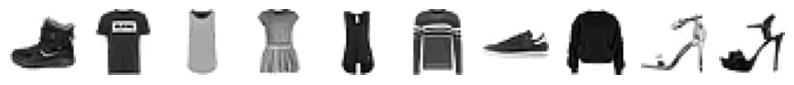

In [131]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') #gray_r >> 현재색에서 반전     # 000 > 검정       255,255,255 > 흰색
    axs[i].axis('off')      # 그래프 off
plt.show()

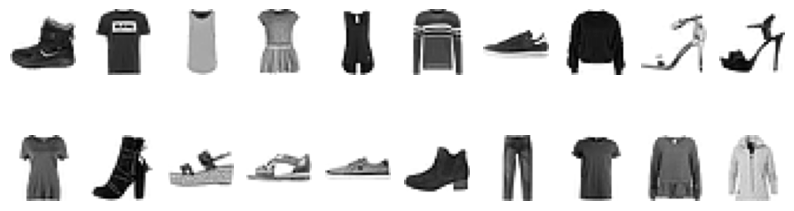

In [132]:
# 두 줄 출력
fig,axs = plt.subplots(2,10,figsize=(10,3))
for i in range(2):
    for j in range(10):
        axs[i][j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i][j].axis('off')
plt.show()

In [133]:
import numpy as np
np.unique(train_target,return_counts=True)      # train_target 값 추출, 유일값 개수 추출

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [134]:
# 데이터를 0~1 값으로 변경
train_scaled = train_input/255
train_scaled[0]
test_scaled = test_input/255


In [135]:
train_scaled = train_scaled.reshape(-1,28*28)   # 28 * 28 = 784개를 1개 묶음으로 변경
train_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [136]:
test_scaled = test_scaled.reshape(-1,28*28)
test_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [137]:
from sklearn.model_selection import cross_validate


In [138]:
# 경사하강법으로 패션 아이템 분류.
from sklearn.linear_model import SGDClassifier
sf = SGDClassifier(loss='log_loss',max_iter=5)
score = cross_validate(sf,train_scaled,train_target,n_jobs=-1,return_train_score=True)

# print(sf.score(train_scaled,train_target))
# print(sf.score(test_scaled,test_target))
print(np.mean(score['train_score']),np.mean(score['test_score']))

0.8267166666666668 0.8156500000000001


In [139]:
classes = np.unique(train_target)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [140]:
train = []
test = []

sf.fit(train_scaled,train_target)
for i in range(50):
    sf.partial_fit(train_scaled,train_target,classes=classes)
    train.append(sf.score(train_scaled,train_target))
    test.append(sf.score(test_scaled,test_target))

c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


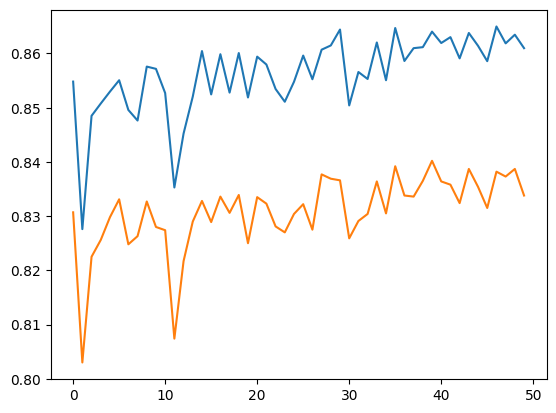

In [142]:
plt.plot(train)
plt.plot(test)

In [143]:
sf = SGDClassifier(loss='log_loss',max_iter=20,tol=None)
score = cross_validate(sf,train_scaled,train_target,n_jobs=-1,return_train_score=True)

# print(sf.score(train_scaled,train_target))
# print(sf.score(test_scaled,test_target))
print(np.mean(score['train_score']),np.mean(score['test_score']))

0.8481250000000001 0.8345499999999999
